<a href="https://colab.research.google.com/github/rivkms/2021_sw_exam/blob/main/5%EC%A3%BC%EC%B0%A8_ML2_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EA%B0%9C%EC%84%A0%ED%95%98%EA%B8%B0(%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.지난 시간 - 결정 트리로 분류 문제 해결하기



### 1-1.문제 정의(분류 문제)



### 1-2.데이터 수집(캐글 데이터셋 이용)

In [ ]:
%ls '/content/drive/My Drive/Colab Notebooks'

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/.kaggle'
# '/content/drive/My Drive/Colab Notebooks' is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/drive/My Drive/Colab Notebooks

In [ ]:
%pwd

In [ ]:
# Pima Indian Diabetes 데이터셋 다운로드
!kaggle datasets download -d uciml/pima-indians-diabetes-database

In [ ]:
# zip파일 압축 해제 후 현재 디렉토리의 파일 리스트 보기
!unzip pima-indians-diabetes-database.zip
!ls

### 1-3.데이터 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# csv 파일을 pandas dataframe으로 읽기
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Outcome(당뇨:1 당뇨아님:0)행의 value를 count
print(diabetes_data['Outcome'].value_counts())

# 상위 5개 행을 출력
diabetes_data.head(5)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 데이터 정보 요약
diabetes_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

### 1-4.모델 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classification
dt = DecisionTreeClassifier() 

dt.fit(x_train, y_train)
dt_prediction = dt.predict(x_test)

### 1-5.모델 예측 및 평가

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 출력
accuracy_score(y_test, dt_prediction)

0.7077922077922078

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# 결정트리 시각화
export_graphviz(dt, out_file='tree.dot', 
                class_names=["not diabetes", "diabetes"], 
                feature_names=x_train.columns, 
                impurity=True, # gini 계수 출력 
                filled=True) # class별 color 채우기

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

print('오차 행렬\n', confusion_matrix(y_test, dt_prediction))
print('\n평가 지표\n', classification_report(y_test, dt_prediction))

오차 행렬
 [[79 21]
 [24 30]]

평가 지표
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154



------------
## 2.데이터 전처리를 이용하여 모델 개선하기



### 2-1.EDA (Exploratory Data Analysis) 탐색적 데이터 분석

수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정.한마디로 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정



> **EDA가 필요한 이유**
- 데이터의 분포 및 값을 검토함으로써 데이터가 표현하는 현상을 더 잘 이해하고, 데이터에 대한 잠재적인 문제를 발견할 수 있다. 이를 통해, 본격적인 분석에 들어가기에 앞서 수집의사를 결정할 수 있다. 
- 다양한 각도에서 살펴보는 과정을 통해 문제 정의 단계에서 미쳐 발생하지 못했을 다양한 패턴을 발견하고, 이를 바탕으로 기존의 가설을 수정하거나 새로운 가설을 세울 수 있다.




### 2-2.피처 스케일링



**피처 스케일링(Feature Scaling)** : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화(standardization) :
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif" >

  데이터 피처별 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것, 각 데이터가 평균으로부터 얼마나 떨어져있는지 나타내기 위해 사용, Scikit-learn의 StandardScaler는 표준화를 쉽게 지원하는 클래스. 



- 정규화(normalization) : 
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Norm_eq.gif">

  데이터의 상대적인 크기에 대한 영향을 줄이기 위해 데이터 범위를 0~1 사이로 변환, Scikit-learn의 MinMaxScaler는 정규화를 쉽게 지원하는 클래스.


[피처 스케일링 참고자료](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)


In [ ]:
# describe를 통해 데이터 특징 살펴보기
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

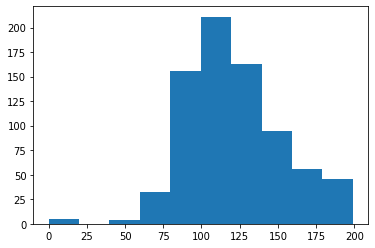

In [ ]:
# 글루코스 값의 분포를 히스토그램으로 확인하기
plt.hist(diabetes_data['Glucose'], bins=10)

In [ ]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,diabetes_data[zero_features].mean())

In [ ]:
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]


# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = 156, stratify=y)

# 학습, 예측 및 평가 수행. 
dt2 = DecisionTreeClassifier()
dt2.fit(x_train,y_train)
dt2_prediction = dt2.predict(x_test)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print('오차 행렬\n', confusion_matrix(y_test, dt2_prediction))
print('\n평가 지표\n', classification_report(y_test, dt2_prediction))

오차 행렬
 [[80 20]
 [29 25]]

평가 지표
               precision    recall  f1-score   support

           0       0.73      0.80      0.77       100
           1       0.56      0.46      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.64       154
weighted avg       0.67      0.68      0.67       154



## 3.하이퍼 파라미터 튜닝으로 모델 개선하기

- 하이퍼 파라미터(hyper parameter) : 학습 프로세스가 시작되기 전에 값이 설정되는 매개 변수, 학습 전에 미리 지정되어 훈련하는 동안은 상수로 남게 되며, 파라미터와 다르게 주로 알고리즘 사용자에 의해 정해짐

- [결정트리의 하이퍼 파라미터](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
  - criterion : {“gini”, “entropy”}, default=”gini” # 분류 기준
  - max_depth : int, default=None  # 결정트리의 최대 깊이
  - min_samples_split : int or float, default=2  # split 가능한 최소 샘플 수
  - min_samples_leaf : int or float, default=1 # leaf 노드의 최소 샘플 수
  - max_features : int, float or {“auto”, “sqrt”, “log2”}, default=None  # 최대 선택할 피처 수



In [ ]:
# 트리의 최대 깊이를 6으로 제한했을 때
dt3 = DecisionTreeClassifier(max_depth=6)
dt3.fit(x_train , y_train)
dt3_prediction = dt3.predict(x_test)

print('오차 행렬\n', confusion_matrix(y_test, dt3_prediction))
print('\n평가 지표\n', classification_report(y_test, dt3_prediction))

오차 행렬
 [[82 18]
 [25 29]]

평가 지표
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.62      0.54      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154



-------------
## 4.k-Fold Cross Validation으로 모델 개선하기

- 표본내 성능과 표본외 성능
  - 표본내 성능 검증(in-sample testing) : 학습 데이터 집합의 종속 변수값을 얼마나 잘 예측하였는지를 나타내는 성능
  - **표본외 성능 검증(out-of-sample testing)** 혹은 **교차검증(cross validation)** : 학습에 쓰이지 않는 표본 데이터 집합의 종속 변수 값을 얼마나 잘 예측하는가를 검사하는 것

- k-폴드 교차검증
  - 데이터의 수가 적은 경우에는 이 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어짐
  - 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않음
  - 데이터의 수가 충분하지 않을 때 학습 데이터를 k개의 폴드로 나눠서 교차검증하는 방법

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=600px>

In [ ]:
# 난수 발생 시드 고정
np.random.seed(7)

from sklearn.model_selection import cross_val_score

dt4 = DecisionTreeClassifier(max_depth=6)

In [ ]:
# 성능 지표 정확도, 교차검증 세트 5개 
scores = cross_val_score(dt4,x_scaled,y,scoring='accuracy')
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.7468 0.6883 0.7013 0.7712 0.7451]
평균 검증 정확도 :  0.7305


## 5.여러 개의 트리를 결합하여 모델 개선하기(RandomForest)

- 앙상블 학습(Ensemble Learning)
  - 좋은 예측 성능을 얻기위해 여러 학습 알고리즘을 결합하여 사용하는 방법
  - 모델 하나로 원하는 성능을 낼 수 없을 때 앙상블 학습을 사용하면 효과적인 경우가 있음
  - 개별로 학습한 여러 모델을 조합하여 일반화(generalization) 성능을 향상시킬 수 있음
  - 성능을 분산시키기 때문에 과적합(overfitting)이 감소할 수 있음 


- 앙상블 학습의 종류
  1. 배깅(Bagging)
    - Bootstrap Aggregation의 약자로 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fb4wG8O%2FbtqyfYW98AS%2FYZBtUJy3jZLyuik1R0aGNk%2Fimg.png" >

  2. 부스팅(Boosting)
    - 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법
    - 여러 개의 모델을 순차적으로 결합한 형태
    - 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 줌
    - 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FkCejr%2FbtqyghvqEZB%2F9o3rKTEsuSIDHEfelYFJlk%2Fimg.png">

  3. 배깅과 부스팅 비교
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fbwr6JW%2FbtqygiHRbRk%2Fcy5hbDAPpTjCG7xa6UWxi0%2Fimg.png">


- 랜덤 포레스트(RandomForest)
  - 배깅 알고리즘의 한 종류
  - 조금씩 다른 여러 결정 트리의 묶음 Tree + Tree = Forest!!!
  - 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다는 아이디어
  - 트리들이 달라지도록 트리 생성 시 무작위성을 주입함
    1. 각 트리를 만들 때 사용하는 데이터를 무작위로 선택
    2. 노드를 분할할 특성을 무작위로 선택 : max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 됨

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 트리 개수 최대 50개
rf = RandomForestClassifier(n_estimators=50,max_features=5,random_state=0 )
rf.fit(x_train , y_train)
rf_prediction = rf.predict(x_test)

print('오차 행렬\n', confusion_matrix(y_test, rf_prediction))
print('\n평가 지표\n', classification_report(y_test, rf_prediction))

오차 행렬
 [[85 15]
 [21 33]]

평가 지표
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
# 성능 지표 정확도, 교차검증 세트 5개
scores = # 빈 칸 #
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))